In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((0.5,), (0.5,))
])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data',
                                 download=True,
                                 train=True,
                                 transform=transform)
trainloader = torch.utils.data.DataLoader(
                    trainset,
                    batch_size=64,
                    shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',
                                download=True,
                                train=False,
                                transform=transform)
testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=64,
                                         shuffle=True)

Here we can see one of the images

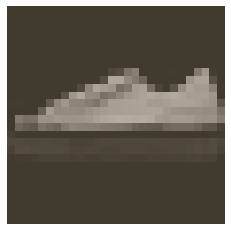

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:])

# Option 1

## Building the Network

Each image is 28x28 which is total of 784 pixels, and there are 10 classes. Use at least one hidden layer. Use ReLU for hidden layers.

In [3]:
# Define the network architecture
from torch import nn
from torch import optim

model = nn.Sequential(nn.Linear(784,256),
                      nn.ReLU(),
                      nn.Linear(256,64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Train the network

In [4]:
epochs = 5

for epoch in range(epochs):
    
    running_loss = 0
    
    for images, labels in trainloader:
        
        # Flatten the images
        images = images.view(images.shape[0], -1)
        
        optimizer.zero_grad()
        
        logits = model(images)
        
        loss = criterion(logits, labels)
        
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        print(f"Training loss: \
                {running_loss/len(trainloader)}")

Training loss:                 0.4966338259070667
Training loss:                 0.369042810966084
Training loss:                 0.32962941148006586
Training loss:                 0.30642958998139985
Training loss:                 0.2857899714841136


In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Conver 2D image to 1D vector
img = img.resize_(1,784)

# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

print(logps)

tensor([[-1.2841e+01, -1.4127e+01, -1.6992e+01, -1.3865e+01, -1.1550e+01,
         -6.0945e+00, -1.2336e+01, -2.4835e-03, -8.7618e+00, -9.9012e+00]])


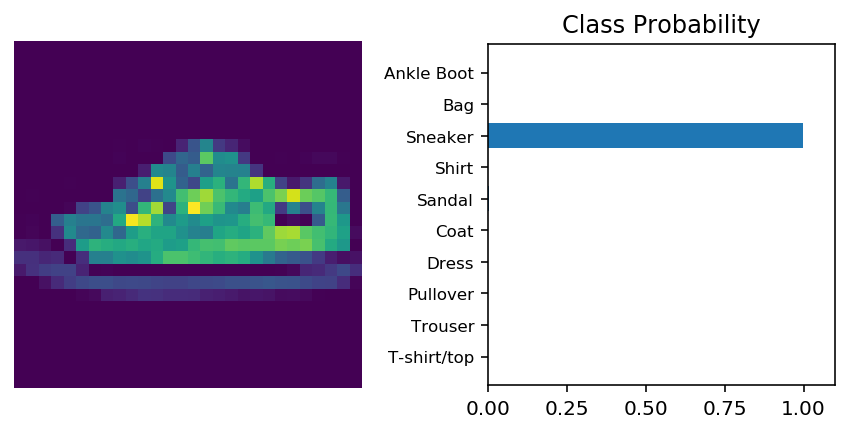

In [6]:
# Calculate the class probabilities for img
ps = torch.exp(logps)
print
helper.view_classify(img.resize_(1,28,28),
                     ps,
                     version='Fashion')

# Option 2

## Building the network

In [7]:
from torch import nn, optim
import torch.nn.functional as F

In [8]:
# Define the network architecture
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

## Train the network

In [9]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [10]:
# Train the network
epochs = 5
for epoch in range(epochs):
    running_loss = 0
    
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        logps = model(images)
        loss = criterion(logps, labels)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f'Training loss: {running_loss/len(trainloader)}')

Training loss: 0.514847291113217
Training loss: 0.39285342168134413
Training loss: 0.3557497617929602
Training loss: 0.3308628025387269
Training loss: 0.31658118535905505


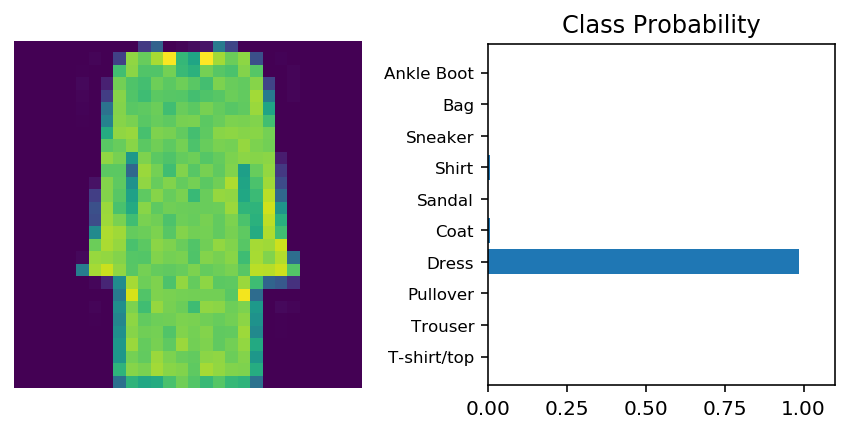

In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# test out the network
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]

# Calculate the class probabilities for img
ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img, ps, version='Fashion')